# What are correlation functions anyway? 

Author: Tanveer Karim
Last Updated: Apr 28, 2025

In this notebook, we will use a more down-to-Earth (literally) data to understand the often-used two-point correlation function (2PCF) in cosmology. By the end of this notebook, you should be able to:

- plot angular data
- measure 2PCF of simple angular data
- explain qualitatively what two different 2PCFs may indicate about the data 

### Preferred Backgrounds: 

While not necessary, having knowledge about the following topics will be helpful in completing this notebook on time: 

- How Jupyter cells work
- basic understanding of mathematical functions 
- what histograms represent
- how to measure Euclidean distances (or Pythagorean theorem)

In [1]:
# basic Python packages we need to run this notebook.
# in case your computer does not have these packages installed, please raise your hand and your instructor can help you.
# if you are python savvy, then you can consider running in a separate cell: 
# pip install PyYAML
# pip install numpy
# pip install matplotlib

import yaml
import numpy as np
import matplotlib.pyplot as plt

## Little dots everywhere

Imagine someone gives you the following set of data points. It could be perhaps subway stations in a city.

 Let's call this dataset A.

```
.        .    .       .         .
     .         .    .    .      .
.     .     .         .     .
```

Now, someone else gives you another set of data points. Let's call it B.

```
. .    .       . . .         .    .
      . . .           . . 
. .          .  .    .  .
```

Before we jump into any crazy mathematics, let's take a moment to think about how these two orchards look like.

*Discussion: Discuss with your neighbors what are the similarities and dissimilarities between the two cities. In particular,*
- *What feels distinctive for each of them?*
- *If you are at a station in City A, how likely do you have to travel before you end up in the next station? What about if you were in City B?*

## Structure from dots

So you may have noticed that the stations in City A are more spread out than the stations in B. We can tell this easily because we can plot these few points and look at them by eye. But, (astro)physics (or any natural sciences) is all about *precise* and *quantitative* statements. We want to somehow convert our qualitative intuition into something that can be calculated. 

### Why we may want to do this? 

Perhaps someone asks us: *What is the best distance to place new stations?* or *How congested are stations in City A compared to City B?*

To achieve this goal, we will need to use some clever mathematical tools that turns this seemingly qualitative geometric problem into something that is more quantitative.

### Data from real world

Before we see how these tools work, let's actually use real-world data! We will explore subways from two cities: Boston, USA and London, UK. 

In [2]:
# this cell allows us to read in the relevant. each file reads in the longitude and latitude values of the subways. 

# we need to preprocess the boston data a little bit to get it in a nice format.
# don't worry about the specifics! 

# read boston data
with open("../data/mbta.yaml", 'r') as stream: # source of MBTA https://erikdemaine.org/maps/mbta/
    boston_dict = yaml.safe_load(stream)

# Dictionary to store unique stations
# Key = station title, Value = (longitude, latitude)
unique_stations = {}

for line in boston_dict:
    stations = line.get('stations', [])
    for station in stations:
        title = station.get('title', 'Unknown')
        longitude = station.get('longitude')
        latitude = station.get('latitude')
        if title not in unique_stations:
            unique_stations[title] = (longitude, latitude)

# Extract the (longitude, latitude) pairs into a list
coords_list = list(unique_stations.values())

# Convert the list to a 2D NumPy array
data_boston = np.array(coords_list)

# read london data
data_london = np.genfromtxt("../data/london.csv",delimiter=',',skip_header=1,usecols=(1,2))
data_london = data_london[:, [1, 0]] # long first, lat second

Now we have two arrays, `data_boston` and `data_london`, that have two columns. The first and the second columns are longitude and latitude respectively. And the number of rows corresponds to the number of stations. 

First, let's figure out how many stations are in each city. You can print out the shape of these arrays by typing `print(array_name.shape)` in the cell below. If the number $2$ represents the number of columns, then what does the other number represent? How many stations are there in each city? 

In [3]:
# your work here 

##FIXME: soln to be removed
print(data_boston.shape)
print(data_london.shape)

# Therefore, Boston has 40 stations and London has 308 stations. 

(268, 2)
(308, 2)


### Visualizing the stations

Unless you are a magician with a powerful visualization, it might be difficult to simply look at these arrays and see how the stations are distributed. You can print out the arrays by typing `print(array_name)` in the following cell. 

In [4]:
# your code here

So what can be a better approach? Well since we know the latitude and the longitude, why not simply plot those values using the power of Python! 

First, we will isolate the longitude and latitude values into seaprate arrays. We can do this by typing `data_boston[:,your_value]` where `your_value` is the column number. So if longitude corresponds to the 1st column, you should type `0` for `your_value`. (Remember that Python starts from 0, not 1 so we use 0 to represent 1st, and so on and so forth). 

In [5]:
#FIXME: soln to be removed
long_boston = data_boston[:,0]
lat_boston = data_boston[:,1]

#FIXME: soln to be removed
# write down the code to extract values for london; define the arrays as long_london and lat_london
long_london = data_london[:,0]
lat_london = data_london[:,1]

We can now the following function: `plt.scatter(x,y)` and plot our subway locations! 

You can also add label information like longitude and latitude. If you are not familiar with how you can do this, ask your instructor. 

Let's first start with Boston. 

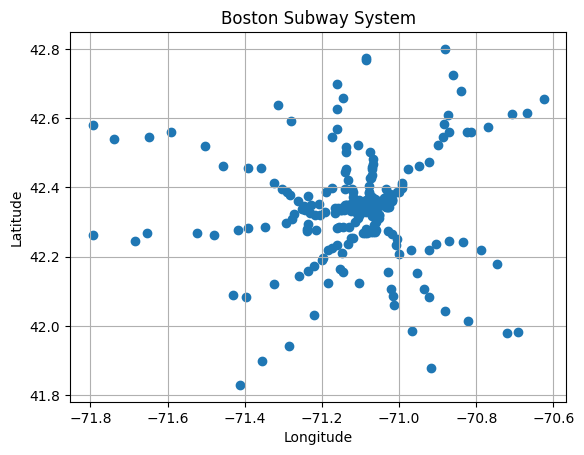

In [6]:
# your code here: plot boston map 

plt.scatter(long_boston , lat_boston)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Boston Subway System")
plt.grid(True)

We are starting to see *some* structure but if you are not familiar with Boston (even if you are familiar), you may be confused about where these points are physically. After all, we removed all the extra information from our map. So for helpful orientation, let's take a look at where the Boston subway stations are in this [link](https://cdn.mbta.com/sites/default/files/2025-03/2025-03-24-commuter-rail-map-v.42f.pdf).

Similarly, let's visualize London.

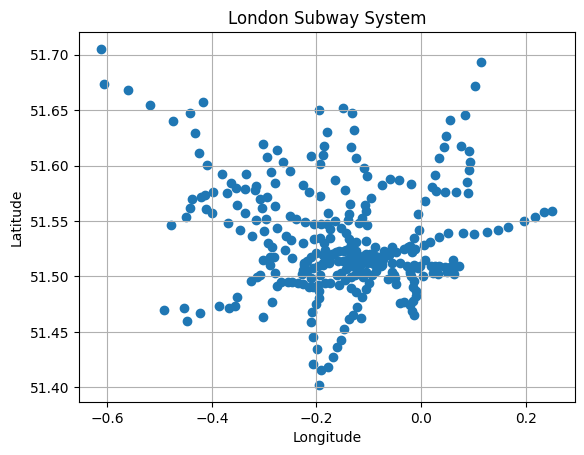

In [7]:
# your code here

plt.scatter(long_london, lat_london)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("London Subway System")
plt.grid(True)

A physical map of the London system can be seen [here](https://media.wired.com/photos/5926bdf4f3e2356fd800a4c6/3:2/w_2240,c_limit/LU-Track-Map.jpg).

Now you may be wondering why we are plotting these values in longitude and latitude rather than physical distances in kilometres or miles. 

We can of course always convert these angular distances to physical distances keeping in mind that since our Earth is curved, two points with the same angular distances separated are physically much farther near the Equator than near the Poles. However, since the size of these cities are so small in comparison to the size of the Earth, we can almost treat them as physical distances. Besides, Boston and London are similar in latitudes ($\sim 40^{\circ}$ versus $\sim 50^{\circ}$), where a $1$ difference in Boston is $85$ km compared to $70$ km in London. So for now, we can stick to this convention. 

There is another similarity between seeing data in this way and how astronomers see data. Often if we do not know the exact distances to galaxies, we pretend that the galaxies are points on the surface of some sphere, as we see the night sky. So you will see for very practical reasons astronomers may discuss distances between galaxies in terms of angles!

**Exercise:** Discuss with your neighbors what the similarities and the differences between Boston and London are. What qualitative features (or vibes) stick out to you? 

### Pair, pair everywhere...

Now we come to the crux of our notebook. 

Remember that at the beginning we discussed that we need some tool to explain to us with numbers how close the stations are with respect to each other, and how those numbers can reflect the intuition we built by looking at the visualizations. 

The simplest thing we can do is calculate what the distance between two stations are. We can count this for every two pairs of stations and note down those values. But how do we find the distances between two points? This is where our old friend, Pythagoras, can come to help. If two points have coordinate values $(x_1, y_1)$ and $(x_2, y_2)$, then by the Pythagoras Theorem, what is the distance between those two points? 

In [8]:
## your code here

def distance_two_points(x1,y1,x2,y2):
    """
    This mathematical function will take four numbers as inputs,
    x1, y1, x2 and y2 (in that order), and give us the distance 
    between (x1,y1) and (x2,y2)
    """
    
    #FIXME: student will work this out
    dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    
    return dist 

With the function ready, we can now calculate distances between every two points. We can use something called the `for` loop. If you are not familiar with it, simply follow the structure. The `for` loop is essentially going row-by-row to calculate the distances. 

In [9]:
num_stations_boston = data_boston.shape[0] # number of stations 
dist_bost = np.zeros((num_stations_boston, num_stations_boston)) # store the distance values in this array

for i in range(num_stations_boston):
    for j in range(num_stations_boston):
        
        #FIXME: students will write this line 
        dist_bost[i,j] = distance_two_points(long_boston[i], lat_boston[i],
                                             long_boston[j], lat_boston[j])

You will notice something interesting here. Our code above treated stations `i` and `j` as a different calculation than stations `j` and `i`. However, the distance between these two stations is exactly the same! So, we are double-counting the distances, and we need to take care of it. 

If you are confused about this, think about it this way. If I have an orange and an apple 1 metre away from each other on a table, then does it matter if I ask *how far is the orange from the apple?* versus *how far is the apple from the orange?*

There is a clever trick we can use to get the number of unique distances. Don't worry about how this works. However, if you have seen some combinatorics in school, then you may read through the documentation of `numpy.triu_indices` and how it works. 

In [10]:
unique_pairs_boston = dist_bost[np.triu_indices(n=num_stations_boston,k=1)]

#### Visualize with histogram

We can now take these distances and visualize them with the help of a histogram. As a reminder, a histogram is like a sifter that tells us how many points fall in a bucket. We will use it to understand what are the *typical* distances between two stations.

Text(0.5, 1.0, 'Boston')

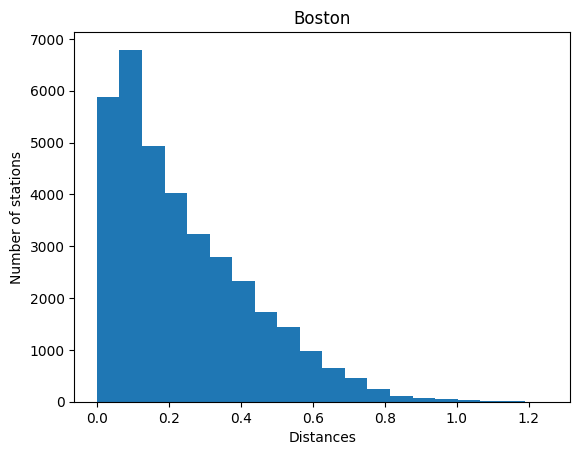

In [11]:
# your code here

#FIXME: bins will be given but students should plug unique_pairs_boston in the first arugment
plt.hist(unique_pairs_boston, bins = 20);
plt.ylabel("Number of stations")
plt.xlabel("Distances")
plt.title("Boston")

For ease of understanding what these distances mean in physical units, multiply `unique_pairs_boston` by $85$ to get the distances in units of kilometre.

Text(0.5, 1.0, 'Boston')

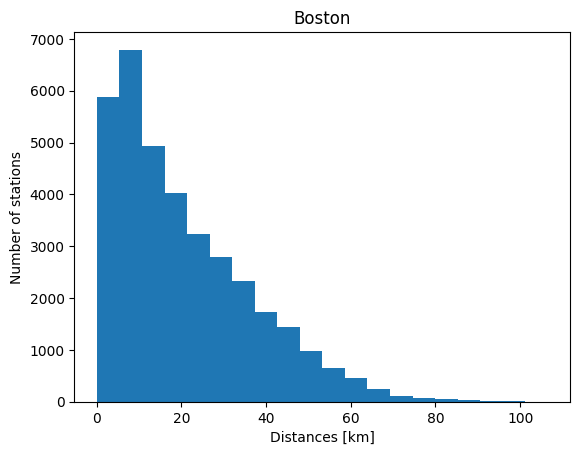

In [12]:
# your code here

#FIXME: bins will be given but students should plug unique_pairs_boston in the first arugment
plt.hist(unique_pairs_boston * 85, bins = 20);
plt.ylabel("Number of stations")
plt.xlabel("Distances [km]")
plt.title("Boston")

**Discussion**: What is the typical distance between two stations in Boston? What else do you notice about how stations are separated?

Now let's do the exact same calculation for London.

In [13]:
# your code here

num_stations_london = data_london.shape[0] # number of stations 
dist_london = np.zeros((num_stations_london, num_stations_london)) # store the distance values in this array

for i in range(num_stations_london):
    for j in range(num_stations_london):
        
        dist_london[i,j] = distance_two_points(long_london[i], lat_london[i],
                                               long_london[j], lat_london[j])
        

unique_pairs_london = dist_london[np.triu_indices(n=num_stations_london, k=1)]

Let's visualize the angular distance first using the histogram technique.

Text(0.5, 1.0, 'London')

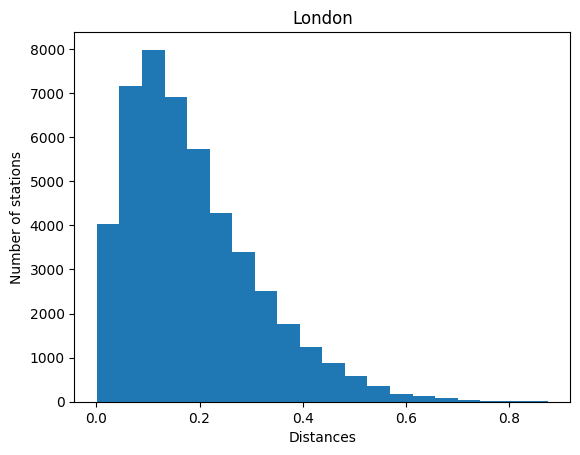

In [14]:
# your code here

plt.hist(unique_pairs_london, bins = 20);
plt.ylabel("Number of stations")
plt.xlabel("Distances")
plt.title("London")

Now let's visualize the same in physical distances. For London, we will multiply the distances by $71$ to get in kilometres. 

Text(0.5, 1.0, 'London')

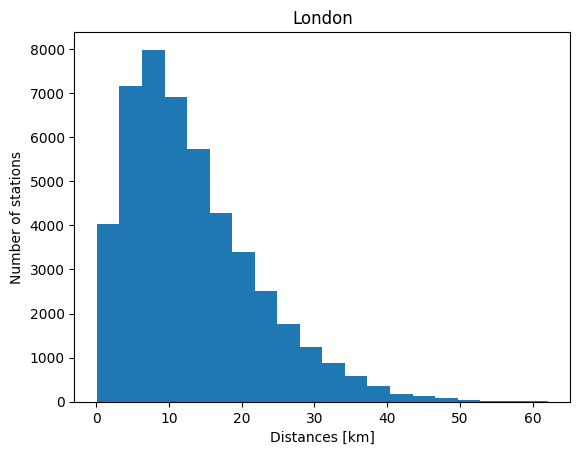

In [15]:
# your code here

plt.hist(unique_pairs_london * 71, bins = 20);
plt.ylabel("Number of stations")
plt.xlabel("Distances [km]")
plt.title("London")

Finally, we want to compare these two histograms to understand how they are different from each other. 

This requires some special preparation. We will use the same bins for both cities for apples-to-apples comparisons. So we will set `bins = np.linspace(0, 100, 20)` to get $20$ bins from $0$ to $100$ km distances. We will also set a new argument in the `plt.histogram()` function, `density = True`. If you have seen probability in your maths class, then this prefers to the probability density function. If you are not familiar with it, think of it as a way to set the y-values to be on the same scale because the two cities have different number of stations. 

You will also set a different color and set the transparency `alpha = 0.5` so we can overlay the two histograms. 

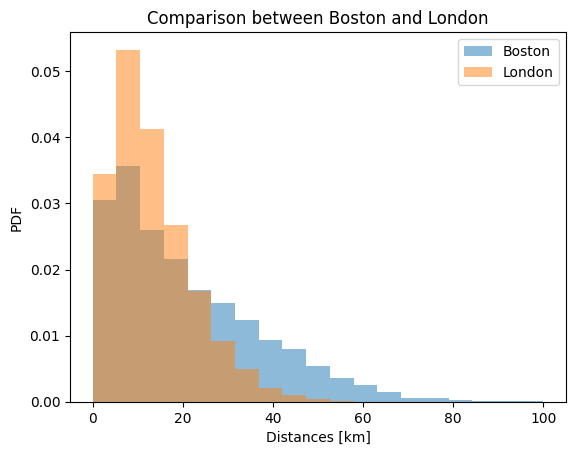

In [16]:
# your code here

plt.hist(unique_pairs_boston * 85, bins = np.linspace(0,100,20),
         alpha=0.5,label='Boston', density = True);
plt.hist(unique_pairs_london * 71, bins = np.linspace(0,100,20),
         alpha=0.5,label='London', density = True);
plt.ylabel("PDF")
plt.xlabel("Distances [km]")
plt.title("Comparison between Boston and London")
plt.legend(loc='best')

**Discussion**: What do you notice as the similarities and the dissimilarities between these two histograms? Which city supports a longer-haul subway system? If you look back at the visualization of the points, does that picture agree with what the histogram is showing? 

### How typical is it from the average?

So by now you may have started to build some intuitions about how these cities cater their citizens. A city with a big suburb may need to have more stations far apart than a city that is more concentrated. While a histogram like above can help us compare between cities, we may want to use something that is more absolute and fundamental. This is where the concept of *randoms* come in to play.

Imagine that there is some fictional city where the number of blocks in each direction is the same, and the exact same number of people live in these blocks. How would you design a subway system for a city like that? 

Now imagine another fictional city, where $90 \%$ of its population lives within a $10 \times 10$ block space, with the rest population spreading out. Would you use the same subway system design for this city as the previous one? 

The first case represents the *ideal* case where there are no *forces* or other conditions at play. That means, in such a city, every citizen are *randomly* distributed without any preferences for blocks. The second case represents something that is more real. Perhaps this city has a river going through it and historically people have lived near the city. So the *force* of wanting to living close to the waterway would imply that the citizens are not *randomly* distributed in this city.

What we often want to do in cosmology is measure how different our typical distances are between two points (galaxies) in the real Universe versus a hypothetical Universe in which the two points (galaxies) are distributed completely randomly. The fractional difference of the realistic second universe (or city) compared to the idealized first universe (or city) is what is known as the *two-point correlation function (2PCF)*. 

This ratio essentially answers: *Compared to randomly placing subway stations (or galaxies), how much more likely are subway stations (or galaxies) to be near each other at a distance of $X$?* Now if you are wondering why this is important, let's visualize a simple example. Imagine a universe in which no gravity exists. In that universe, no galaxies are being attracted to each other; they are spread out truly randomly. But in our universe, where gravity exists, we may see more galaxies closer to each other. Thus, this correlation function can tell us how important the force of gravity is at different scales. 

#### Making a random catalogue

Let's make a random catalogue now to compare both of our cities. While you are not expected to necessarily understand how the following code works, if you have time, feel free to go through the logic and ask your instructor to explain! 

In [37]:
# boston random catalogue
nrandom_per_axis = 500
long_range_b = np.linspace(long_boston.min(), long_boston.max(), nrandom_per_axis)
lat_range_b = np.linspace(lat_boston.min(), lat_boston.max(), nrandom_per_axis)

X,Y = np.meshgrid(long_range_b, lat_range_b)
coords_boston = np.stack([X.ravel(), Y.ravel()], axis=1)
long_boston_random = coords_boston[:,0]
lat_boston_random = coords_boston[:,1]

# optional, visualize random grid
# plt.scatter(xx, yy)

# london random catalogue
long_range_l = np.linspace(long_london.min(), long_london.max(), nrandom_per_axis)
lat_range_l = np.linspace(lat_london.min(), lat_london.max(), nrandom_per_axis)

X,Y = np.meshgrid(long_range_l, lat_range_l)
coords_london = np.stack([X.ravel(), Y.ravel()], axis=1)
long_london_random = coords_london[:,0]
lat_london_random = coords_london[:,1]

# optional, visualize random grid
# plt.scatter(xx, yy)

Now, we want to repeat the histogram exercise and calculate the typical distance for these *random* cities that are like Boston and London. You can run the following cell that will calculate the unique pairs for both cities. 

In [38]:
## Boston random pairs

dist_bost_rand = np.zeros((nrandom_per_axis, nrandom_per_axis)) # store the distance values in this array

for i in range(nrandom_per_axis):
    for j in range(nrandom_per_axis):
        
        dist_bost_rand[i,j] = distance_two_points(long_boston_random[i], lat_boston_random[i],
                                             long_boston_random[j], lat_boston_random[j])
        
unique_pairs_boston_rand = dist_bost_rand[np.triu_indices(n=nrandom_per_axis,k=1)]

In [40]:
## London random pairs

dist_london_rand = np.zeros((nrandom_per_axis, nrandom_per_axis)) # store the distance values in this array

for i in range(nrandom_per_axis):
    for j in range(nrandom_per_axis):
        
        dist_london_rand[i,j] = distance_two_points(long_london_random[i], lat_london_random[i],
                                             long_london_random[j], lat_london_random[j])
        
unique_pairs_london_rand = dist_london_rand[np.triu_indices(n=nrandom_per_axis,k=1)]

Just like `unique_pairs_bost` and `unique_pairs_london`, we can plot the *random* cities. Let's make histogram of the real versus random and look at them. 

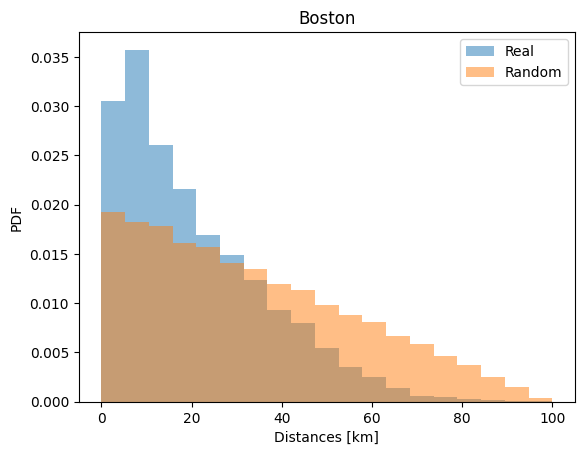

In [41]:
# your code here 

plt.hist(unique_pairs_boston*85, bins = np.linspace(0,100,20),
         alpha=0.5,label='Real', density = True);
plt.hist(unique_pairs_boston_rand*85, bins = np.linspace(0,100,20),
         alpha=0.5,label='Random', density = True);
plt.ylabel("PDF")
plt.xlabel("Distances [km]")
plt.title("Boston")
plt.legend(loc='best')

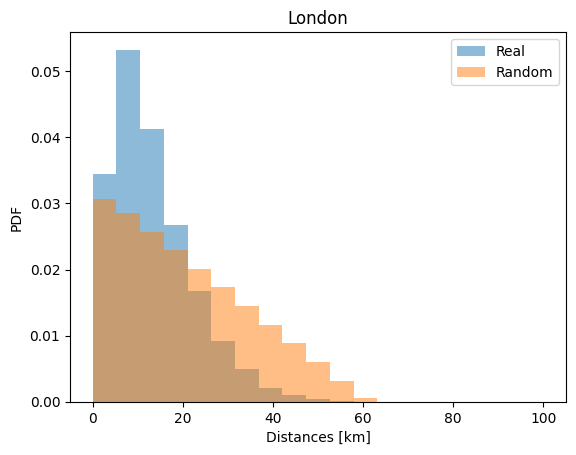

In [42]:
# your code here 

plt.hist(unique_pairs_london * 71, bins = np.linspace(0,100,20),
         alpha=0.5,label='Real', density = True);
plt.hist(unique_pairs_london_rand * 71, bins = np.linspace(0,100,20),
         alpha=0.5,label='Random', density = True);
plt.ylabel("PDF")
plt.xlabel("Distances [km]")
plt.title("London")
plt.legend(loc='best')

**Discussion:** When you look at how the *random* values look compared to the actual city, what sticks out to you? 

#### Defining Two-Point Correlation Function (2PCF)

Now we finally come to the definition of 2PCF. Mathematically, it is given by:

\begin{equation}
    2PCF(x) = \frac{DD(x)}{RR(x)} - 1
\end{equation}

Here, $x$ refers the distance between two stations, $DD$ refers to the data from the actual cities, and $RR$ refers to the data from the random city. You can use the power of the histogram function to get these values. 

We have already defined what the center of the histogram bins are. You only have to write the function that calculates the 2PCF. 

In [43]:
# define histogram bin centers 

number_of_bins = 25
bin_center_boston = np.histogram(unique_pairs_boston, 
                               bins = number_of_bins, 
                               range=(dist_bost.min(), dist_bost.max()))[1][:-1] + \
                                   np.diff(np.histogram(unique_pairs_boston, 
                                                        bins = number_of_bins, 
                                                        range=(dist_bost.min(), dist_bost.max()))[1])/2 # mid of bin edges
bin_center_boston = 85 * bin_center_boston

bin_center_london = np.histogram(unique_pairs_london, 
                               bins = number_of_bins, 
                               range=(dist_london.min(), dist_london.max()))[1][:-1] + \
                                   np.diff(np.histogram(unique_pairs_london, 
                                                        bins = number_of_bins, 
                                                        range=(dist_london.min(), dist_london.max()))[1])/2 # mid of bin edges
bin_center_london = 71 * bin_center_london

Note that ideally the number of points used in the real map and the random map should be the same. But there are reasons to make the number of points in random higher than the real map as we have done here. In that case, we can correct for this, and we provide you with the number that you need to multiply the 2PCF with to get the correct answer. 

In [68]:
def twopcf(dd, rr):
    """
    Returns the 2PCF when given real and random data from histogram outputs.
    """
    
    norm_factor = rr.sum()/dd.sum()
    
    # your code here
    res = dd/rr * norm_factor - 1
    
    return res 

Now let's calculate the 2PCF for Boston first and plot it. 

In [69]:
DD_bost = np.histogram(unique_pairs_boston, 
                       bins = number_of_bins, 
                       range=(dist_bost.min(),dist_bost.max()))[0] 

RR_bost = np.histogram(unique_pairs_boston_rand,
                       bins = number_of_bins,
                       range=(dist_bost.min(),dist_bost.max()))[0]                                

# your code here 
twopcf_bost = twopcf(DD_bost, RR_bost)

/var/folders/s2/zrtt0b094p52rpt0m42r4xmr0000gn/T/ipykernel_5934/3860267043.py:9: RuntimeWarning: divide by zero encountered in divide
  res = dd/rr * norm_factor - 1


Text(0.5, 1.0, 'Boston')

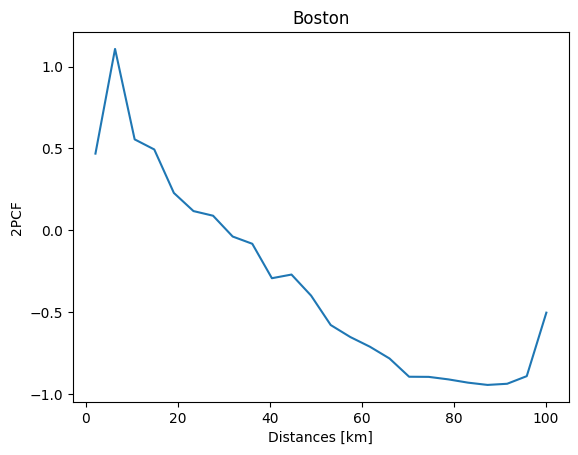

In [71]:
# your code here to plot

plt.plot(bin_center_boston, twopcf_bost)
plt.xlabel("Distances [km]")
plt.ylabel("2PCF")
plt.title("Boston")

Let's do the same for London.

In [72]:
# your code here

DD_lond = np.histogram(unique_pairs_london, 
                       bins = number_of_bins, 
                       range=(dist_london.min(),dist_london.max()))[0] 

RR_lond = np.histogram(unique_pairs_london_rand,
                       bins = number_of_bins,
                       range=(dist_london.min(),dist_london.max()))[0]                                

# your code here 
twopcf_london = twopcf(DD_lond, RR_lond)

Text(0.5, 1.0, 'London')

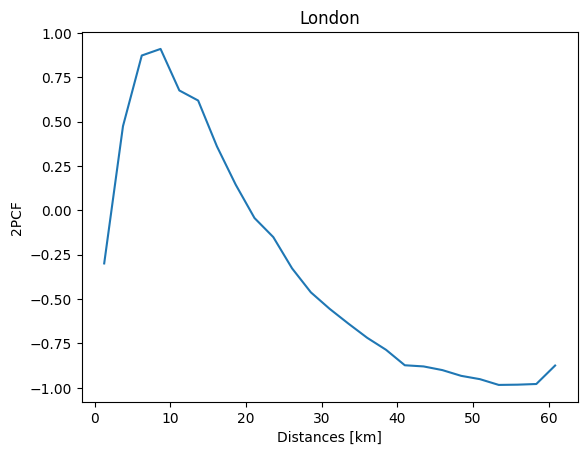

In [73]:
# your code here to plot

plt.plot(bin_center_london, twopcf_london)
plt.xlabel("Distances [km]")
plt.ylabel("2PCF")
plt.title("London")

Finally, let's plot these two functions together.

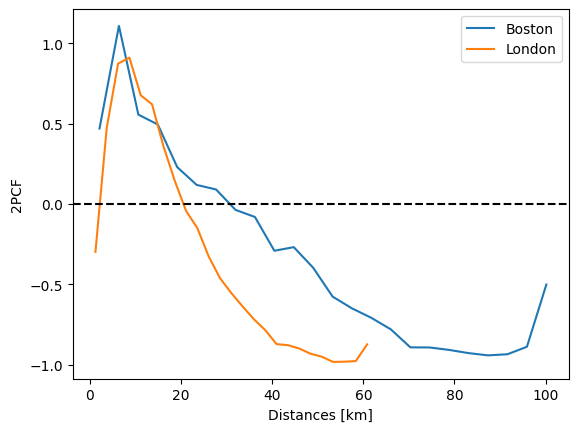

In [76]:
# your code here to plot

plt.plot(bin_center_boston, twopcf_bost, label = 'Boston')
plt.plot(bin_center_london, twopcf_london, label = 'London')

plt.xlabel("Distances [km]")
plt.ylabel("2PCF")

plt.legend(loc='best')

plt.axhline(0, c = 'k', ls = '--')


**Discussion:** Remembering that 2PCF represents the amount of *excess* concentration (or clustering) of subway stations compared to randomly distributed stations, what can you say about Boston and London? What are their similarities and dissimilarities? Up to what distance do we see the cities have *more* subways than random, and when do they start becoming *less* than random? What could this scale tell us about what kind of city these are? Does this quantitative calculation match the intuition you built from looking at the data by eye?